# Aufgabe 26

## a) Erstellen sie ein Dataframe mit 105 uniform zwischen 0 und 1 verteilten Zufallszahlen 𝑥1, 𝑥2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
rng = np.random.default_rng(42)

In [3]:
x1 = rng.uniform(0,1,105)
x2 = rng.uniform(0,1,105)

df = pd.DataFrame(data = {'x1':x1,'x2':x2})

In [4]:
df

,x1,x2
0,0.773956,0.716890
1,0.438878,0.449362
2,0.858598,0.272242
3,0.697368,0.096391
4,0.094177,0.902602
...,...,...
100,0.908581,0.229656
101,0.699707,0.131822
102,0.265870,0.677659
103,0.969176,0.121833


## b) Berechnen sie aus diesen Attributen ein drittes Attribut 𝑥3 mit der Funktionsvorschrift:

$$x_3 = 15 \sin(4\pi x_1) + 60 (x_2 - 0.5)^2$$
Addieren Sie auf diese Zahl eine standardnormalverteilte Zufallszahl, um Rauschen zu simulieren.
Das 𝑥3 Attribut ist von nun an Ihr Zielattribut.

In [5]:
x3 = 15*np.sin(4*np.pi*x1) + 60*(x2-0.5)**2
df['x3'] = x3

## c) Teilen Sie das Dataframe in einen Trainings- und Test-Datensatz auf.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_df, test_df = train_test_split(df, test_size = 0.4, random_state = rng.integers(10**4))

In [8]:
train_df.shape, test_df.shape

((63, 3), (42, 3))

## d) Wählen Sie einen Random-Forest-Regressor mit 200 Bäumen und trainieren Sie diesen auf dem Trainingsdatensatz um 𝑥3 zu schätzen.

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
rnd_forest = RandomForestRegressor(n_estimators=200)

In [11]:
rnd_forest.fit(train_df[['x1','x2']],train_df['x3'])

RandomForestRegressor(n_estimators=200)

## e) Stellen Sie die erstellten Daten und die Vorhersagen des Regressors in einem dreidimensionalen Plot und mehreren 2 dimensionalen Projektionen dar um die Vorhersage mit der Wahrheit zu vergleichen. Geben sie außerdem den mean-squared-error der Vorhersage zu den wahren Werten an.

In [12]:
x3_train_pred = rnd_forest.predict(train_df[['x1','x2']])
x3_pred = rnd_forest.predict(test_df[['x1','x2']])

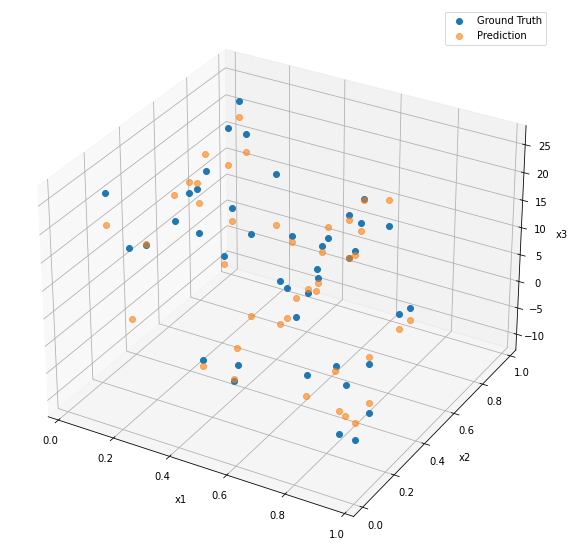

In [13]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(test_df['x1'],test_df['x2'],test_df['x3'], 'o', label='Ground Truth')
ax.plot(test_df['x1'],test_df['x2'],x3_pred, 'o', alpha=0.6, label='Prediction')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.legend()

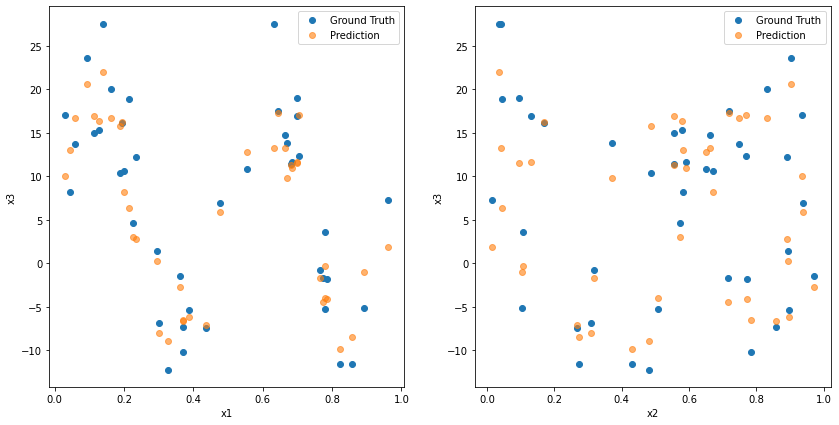

In [14]:
fig,axs = plt.subplots(1,2, figsize=(14,7))

axs[0].plot(test_df['x1'],test_df['x3'], 'o', label='Ground Truth')
axs[0].plot(test_df['x1'],x3_pred, 'o', alpha=0.6, label='Prediction')
axs[0].set_xlabel('x1')
axs[0].set_ylabel('x3')
axs[0].legend()

axs[1].plot(test_df['x2'],test_df['x3'], 'o', label='Ground Truth')
axs[1].plot(test_df['x2'],x3_pred, 'o', alpha=0.6, label='Prediction')
axs[1].set_xlabel('x2')
axs[1].set_ylabel('x3')
axs[1].legend()

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
print(f'Training Mean Squared Error: \t{mean_squared_error(train_df["x3"],x3_train_pred):.5f}')
print(f'Test Mean Squared Error: \t{mean_squared_error(test_df["x3"],x3_pred):.5f}')

Training Mean Squared Error: 	2.50720
Test Mean Squared Error: 	20.80625


## f) Erstellen Sie einen weiteren Datensatz, bei dem 𝑥1 und 𝑥2 uniform verteilte Zufallszahlen zwischen 1 und 2 sind. Testen sie nun das in (d) trainierte Modell auf dem neu erstellten Datensatz. Trainieren sie das Modell NICHT auf dem neuen Datensatz. Was für Probleme können hier auftreten und was ist die Vorhersage des Regressors? Stellen Sie das Ergebnis wie in Aufgabe (e) dar.

In [21]:
x1_f = rng.uniform(1,2,105)
x2_f = rng.uniform(1,2,105)

df_f = pd.DataFrame(data = {'x1':x1_f,'x2':x2_f})

In [22]:
x3_f = 15*np.sin(4*np.pi*x1_f) + 60*(x2_f-0.5)**2
df_f['x3'] = x3_f

In [23]:
x3_pred_f = rnd_forest.predict(df_f[['x1','x2']])

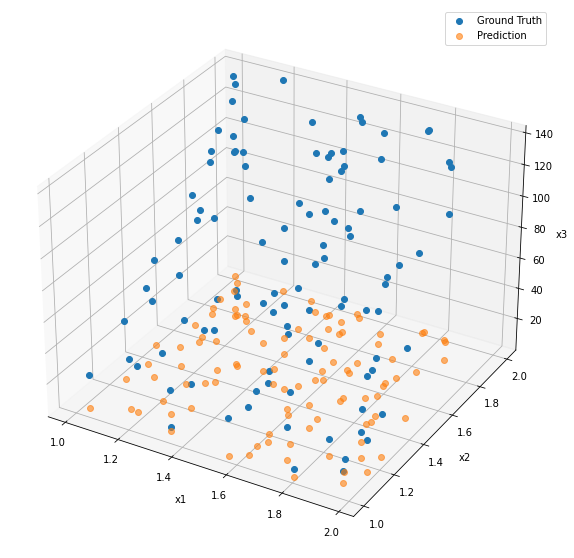

In [24]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(df_f['x1'],df_f['x2'],df_f['x3'], 'o', label='Ground Truth')
ax.plot(df_f['x1'],df_f['x2'],x3_pred_f, 'o', alpha=0.6, label='Prediction')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.legend()